# Messing around with Time Series

### Converting SF crime event data to classical time series


In [1]:
#import libraries

import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt


In [2]:
#import data
file_loc ="/Users/Lawrence/Documents/MACHINE_LEARNING/Exercises/Real_world_ML/sfpd_incident_all.csv"
df = pd.read_csv(file_loc)

In [3]:
df.head()

,IncidntNum,Category,Date,Time,PdDistrict
0,30203898,FRAUD,02/18/2003,16:30,NORTHERN
1,38261,WARRANTS,04/17/2003,22:45,NORTHERN
2,30203901,LARCENY/THEFT,02/18/2003,16:05,NORTHERN
3,30203923,DRUG/NARCOTIC,02/18/2003,17:00,BAYVIEW
4,30203923,OTHER OFFENSES,02/18/2003,17:00,BAYVIEW


In [4]:
df['Month'] = df["Date"].map(lambda x: datetime.strptime("/".join(x.split("/")[0::2]),
                                             "%m/%Y"))
df_ts = df.groupby('Month').aggregate(len)["IncidntNum"]

In [28]:
df.head()

,IncidntNum,Category,Date,Time,PdDistrict,Month
0,30203898,FRAUD,02/18/2003,16:30,NORTHERN,2003-02-01
1,38261,WARRANTS,04/17/2003,22:45,NORTHERN,2003-04-01
2,30203901,LARCENY/THEFT,02/18/2003,16:05,NORTHERN,2003-02-01
3,30203923,DRUG/NARCOTIC,02/18/2003,17:00,BAYVIEW,2003-02-01
4,30203923,OTHER OFFENSES,02/18/2003,17:00,BAYVIEW,2003-02-01


In [5]:
df_ts.head()

Month
2003-01-01    13482
2003-02-01    12296
2003-03-01    13385
2003-04-01    13094
2003-05-01    12950
Name: IncidntNum, dtype: int64

Text(0, 0.5, 'Number of Crimes')

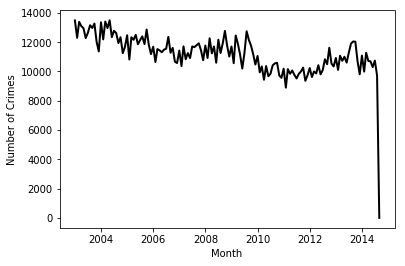

In [29]:
plt.plot(df_ts.index, df_ts.values,'-k', lw=2)
plt.xlabel("Month")
plt.ylabel("Number of Crimes")

### Windowed statistics and differences

In [38]:
import numpy as np

In [55]:
#using spring 2014 as window
window1 = (datetime(2014, 3, 22), datetime(2014, 6, 21))

idx_window1 = np.where(df_ts.index.map(lambda x: x>=window1[0] and x <= window1[1]))[0]
#compute the windowed mean and standard deviation 
mean_window1 = np.mean(df_ts.values[idx_window1])
std_window1 = np.std(df_ts.values[idx_window1])

window2 = (datetime(2013,3,22), datetime(2013,6,21))
# compute the windowed mean and std for spring 2013
idx_window2 = np.where(df_ts.index.map(lambda x: x>= window2[0] and x <= window2[1]))[0]
mean_window2 = np.mean(df_ts.values[idx_window2])
std_window2 = np.std(df_ts.values[idx_window2])

# compute the windowed difference in mean and standard deviation
mean_wdiff = mean_window1 - mean_window2
std_wdiff = std_window1 - std_window2

### Compute Periodigrame and Features

In [58]:
import scipy.signal

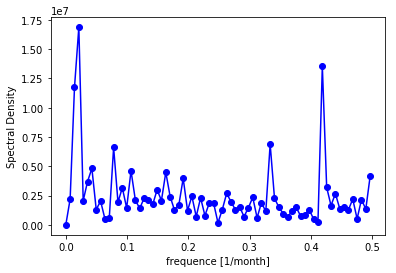

In [60]:
#compute the periodigram
f, psd = scipy.signal.periodogram(df_ts, detrend='linear')

plt.plot(f, psd, '-ob')
plt.xlabel('frequence [1/month]')
plt.ylabel('Spectral Density')
plt.show()

# Features
# period of highest peak for this data
period_psd1 = 1./f[np.argmax(psd)]

# sum of spectral density higher than 1/12 months
sdens_gt_12m = np.sum(psd[f > 1./12])

# ratio of spectral density higher than to less tha 1/12 months
sdens_ratio_12m = float(sdens_gt_12m) / np.sum(psd[f <= 1./12])